<a href="https://colab.research.google.com/github/sagarkh1997/ML_Assignment/blob/main/pa5/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Assignment 5 - Build your own Conventional Neural Network

After completing this project, you will be able to do the following:

- Build neural network conveniently.
- Configure with different regularization methods: Dropout, l1 or l2 regulation.

- **574 Only**: Fine tune pre-trained model to build your own projects.

# Dataset

This dataset is provided by our current research project, which utilize 20 kHz acoustic sensing to sense ASL gestures. All the 10 ASL words perform by 5 subjects. All images are generated by using the short-time Fourier transform (STFT) to calculate a spectrogram as the feature representation of the reflected near-ultrasound waves. Based on the Doppler effect, sign language gestures, including both hands and arms, will cause phase and frequency changes of the reflected sonic wave. The spectrogram contains information in both frequency and time domains. The spectrogram is also defined as the Power Spectral Density of the function:
\begin{equation}
    \textrm{spectrogram}\{x(t)\}(\tau,\omega)\equiv |X(\tau,\omega)|^{2}= \left| \sum^{\infty}_{n=-\infty}x[n]\omega[n-m]e^{-j\omega n}\right|^{2}
\end{equation}
where $x[n]$ is input signal, and $\omega[n-m]$ represents the overlapping Kaiser window function with an adjustable shape factor $\beta$ that improves the resolution and reduces the spectral leakage close to the sidelobes of the signal. The coefficients of the Kaiser window are computed as:
\begin{equation}
    \omega[n]=\frac{I_{0}\left(\beta\sqrt{1-\left(\frac{n-N/2}{N/2}\right)^{2}}\right)}{I_{0}(\beta)}, 0 \leq n \leq N
\end{equation}

This dataset has a training set of 5,000 examples, and a test set of 1,000 examples.

# Submission

1. **Coding checks (60 points)** - The code for your implementation should be in Python only. The name of the Main file should be main.ipynb or main.py. Please provide necessary comments in the code.

2. **Written Report (40 points)**: The report should be delivered as a separate pdf file, and it is recommended for you to use the NIPS template to structure your report. You may include comments in the Jupyter Notebook, however you will need to duplicate the results in the report. The report should describe your results, experimental setup and comparison between the results obtained
from different setting of the algorithm and dataset.**Again, the questions in the Assignment PDF and here are the same (for the written report), we just put them in both places for convenience.**


As such, you will submit, one member of your group will subit as a zip file on UBLearns, a ```.zip``` file that contains 3 things:
- Your completed jupyter notebook.
- Your written report.

In [2]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile
from tensorflow.keras import regularizers
from keras.applications.resnet import ResNet50
from keras.models import Model
from google.colab import drive
## please add the essential libraries
drive.mount('/content/gdrive',force_remount=True)
## please add the essential libraries

# YOUR CODE HERE


Mounted at /content/gdrive


## Part 1. loading dataset

We have splitted the dataset into training, validation and test. You can load every single folder to load dataset using keras ImageDataGenerator (10 points).

In [3]:
# load the file from our dataset including training, validation and testing part
img_width, img_height = 224, 224
# train_data_dir      = 'gdrive/MyDrive/pictures/train'
# validation_data_dir = 'gdrive/MyDrive/pictures/val'
# test_data_dir       = 'gdrive/MyDrive/pictures/test'

train_data_dir      = 'pictures/train'
validation_data_dir = 'pictures/val'
test_data_dir       = 'pictures/test'

epochs = 50
batch_size = 16

# # this is a generator that will read pictures found in
# # subfolers of 'data/train', and indefinitely generate
# # batches of augmented image data
datagen = ImageDataGenerator(rescale=1./255)
        #rotation_range=40,
        #width_shift_range=0.2,
        #height_shift_range=0.2,
        #shear_range=0.2,
        #zoom_range=0.2,
        # horizontal_flip=True,
        #fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Your Code HERE
train_generator = datagen.flow_from_directory(train_data_dir,target_size=(img_width,img_height),batch_size=batch_size, class_mode='categorical')
valid_generator = test_datagen.flow_from_directory(validation_data_dir,target_size=(img_width,img_height),batch_size=batch_size, class_mode='categorical')
test_generator  = test_datagen.flow_from_directory(test_data_dir,target_size=(img_width,img_height),batch_size=batch_size, class_mode='categorical')


# please print the number of samples in each folder 
# Your Code HERE

Found 4176 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.


## Part 2.1 - Build your Neural Network and Train

Build a Convolutional Neural Network with 2 or 3 hidden layers without regularization methods, which includes Conv2D layer, activation Layer. please use training dataset and validation dataset for training processs, and plot the training process with Loss trend and accuracy trend (30 Points).

## Part 2.2 - Test 

Test your machine learning model on the testing set: After finishing all the above steps, fix your hyper-parameters(learning rate, number of neurons per layer) and model parameter and test your model’s performance on the testing set. This shows the effectiveness of your model’s generalization power gained by learning. For test dataset, the performance should be more than 80% (10 Points).

In [48]:
# build conv2D CNN model, be careful with softmax and output layers is 10

# define the input shape of Convolutional Neural Network
# Your Code HERE
input_shape = (224,224,3) 

# define the Convolutional Neural Network
model = Sequential()
#Input Layer where we use cnn with 32 neurons, kernel size of (3,3) and input shape with image size and rgb channel to mention colors
model.add(Conv2D(32, (3, 3),input_shape=(224,224,3)))
#Using Activation function Relu for the input layer
model.add(Activation('relu'))
# To reduce the dimension We use pooling layer of size(3,3) which will give us faster computation
model.add(MaxPooling2D(pool_size=(3, 3)))
# Hidden Layer 1 
model.add(Conv2D(32, (3, 3)))
# Hidden Layer 1's Activation Function
model.add(Activation('relu'))
# Hidden Layer's pooling layer
model.add(MaxPooling2D(pool_size=(3, 3)))
#Hidden Layer 2
model.add(Conv2D(64, (3,3)))
#Hidden Layer 2's Activation Function
model.add(Activation('relu'))
#Hidden Layer 2's Pooling layer to reduce the computational cost
model.add(MaxPooling2D(pool_size=(3, 3)))
#Hidden Layer 3 to convert it into 1D shape
model.add(Flatten())
#Output Layer mentioning number of classes
model.add(Dense(10))
#Output layer's activation function. Using softmax as it works well with images
model.add(Activation('softmax'))
# # Your Code HERE


In [49]:
# Compiling the model and training including the files of compile and fit
#Your code 

# Using standard adam optimizer which has a learning rate of 0.01 to improve the accuracy of the model and reduce the loss
# Used the loss function categorical_crossentropy as we have 10 classes and this would help us in classifying them
model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

#Train the model with training and validation set
model_normal = model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=valid_generator,validation_steps=len(valid_generator))
# model.save_weights('first_try.h5')

Epoch 1/50
261/261 [==============================] - 28s 105ms/step - loss: 0.6765 - accuracy: 0.7792 - val_loss: 0.6015 - val_accuracy: 0.8736
Epoch 2/50
261/261 [==============================] - 29s 112ms/step - loss: 0.0516 - accuracy: 0.9847 - val_loss: 0.5367 - val_accuracy: 0.9203
Epoch 3/50
261/261 [==============================] - 27s 104ms/step - loss: 0.0065 - accuracy: 0.9978 - val_loss: 0.7391 - val_accuracy: 0.8894
Epoch 4/50
261/261 [==============================] - 29s 113ms/step - loss: 0.0313 - accuracy: 0.9928 - val_loss: 0.9156 - val_accuracy: 0.8901
Epoch 5/50
261/261 [==============================] - 27s 105ms/step - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.7637 - val_accuracy: 0.8685
Epoch 6/50
261/261 [==============================] - 30s 113ms/step - loss: 4.2465e-04 - accuracy: 1.0000 - val_loss: 0.8028 - val_accuracy: 0.8930
Epoch 7/50
261/261 [==============================] - 27s 105ms/step - loss: 1.1100e-04 - accuracy: 1.0000 - val_loss: 0.8501 

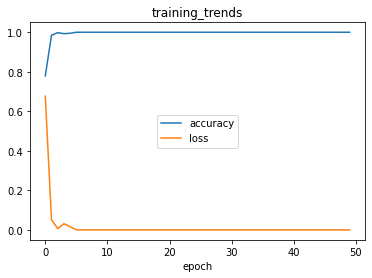

In [50]:
plt.plot(model_normal.history['accuracy'])
plt.plot(model_normal.history['loss'])
plt.title('training_trends')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='center')

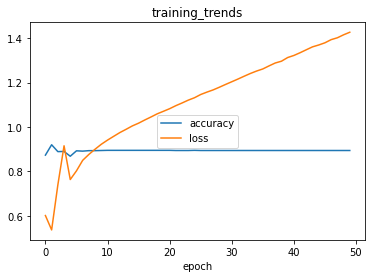

In [51]:
plt.plot(model_normal.history['val_accuracy'])
plt.plot(model_normal.history['val_loss'])
plt.title('training_trends')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='center')

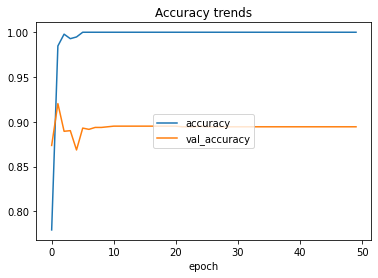

In [52]:
plt.plot(model_normal.history['accuracy'])
plt.plot(model_normal.history['val_accuracy'])
plt.title('Accuracy trends')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='center')

%Test

In [53]:
# Test the model on a testing dataset
# Your Code HERE
test_accuracy = model.evaluate(test_generator)

87/87 [==============================] - 7s 77ms/step - loss: 1.2788 - accuracy: 0.8657


## Part 2.3 - L1 Regularization. Please add L1 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

In [54]:
# please redefine your model with setting the L1 Regularization in the layer of Conv 2D

# Your code HERE
model_L1 = Sequential()
#The model is the same as previous one. just that we are adding l1 regularizer to reduce overfitting
model_L1.add(Conv2D(32, (3, 3),input_shape=(224,224,3),kernel_regularizer='l1'))
model_L1.add(Activation('relu'))
model_L1.add(MaxPooling2D(pool_size=(3, 3)))
model_L1.add(Conv2D(32, (3, 3)))
# model_L1.add(regularizers.L1(l1=1e-5))
model_L1.add(Activation('relu'))
model_L1.add(MaxPooling2D(pool_size=(3, 3)))
model_L1.add(Conv2D(64, (3,3)))
model_L1.add(Activation('relu'))
model_L1.add(MaxPooling2D(pool_size=(3, 3)))
# model_L1.add()
model_L1.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
model_L1.add(Dense(10))
model_L1.add(Activation('softmax'))

model_L1.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

#Train the model with training and validation set
model_L1_normal = model_L1.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=valid_generator,validation_steps=len(valid_generator))


Epoch 1/50
261/261 [==============================] - 29s 111ms/step - loss: 0.9512 - accuracy: 0.7701 - val_loss: 0.7256 - val_accuracy: 0.8341
Epoch 2/50
261/261 [==============================] - 29s 110ms/step - loss: 0.1277 - accuracy: 0.9856 - val_loss: 0.6001 - val_accuracy: 0.8649
Epoch 3/50
261/261 [==============================] - 33s 125ms/step - loss: 0.0529 - accuracy: 0.9971 - val_loss: 0.5251 - val_accuracy: 0.9059
Epoch 4/50
261/261 [==============================] - 27s 105ms/step - loss: 0.0318 - accuracy: 0.9998 - val_loss: 0.5413 - val_accuracy: 0.8829
Epoch 5/50
261/261 [==============================] - 29s 112ms/step - loss: 0.0302 - accuracy: 0.9983 - val_loss: 0.5515 - val_accuracy: 0.9030
Epoch 6/50
261/261 [==============================] - 27s 104ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 0.5382 - val_accuracy: 0.8980
Epoch 7/50
261/261 [==============================] - 30s 114ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.5680 - val_ac

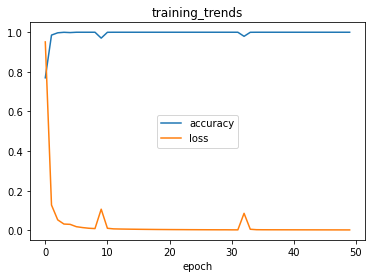

In [55]:
plt.plot(model_L1_normal.history['accuracy'])
plt.plot(model_L1_normal.history['loss'])
plt.title('training_trends')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='center')
plt.show()

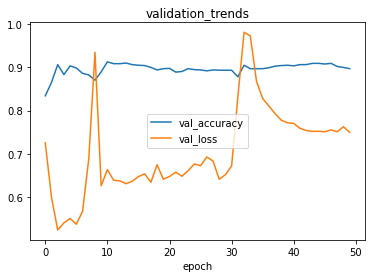

In [56]:
plt.plot(model_L1_normal.history['val_accuracy'])
plt.plot(model_L1_normal.history['val_loss'])
plt.title('validation_trends')
plt.xlabel('epoch')
plt.legend(['val_accuracy', 'val_loss'], loc='center')
plt.show()

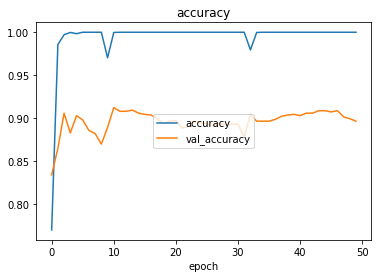

In [57]:
plt.plot(model_L1_normal.history['accuracy'])
plt.plot(model_L1_normal.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='center')
plt.show()

In [58]:
test_accuracy_L1 = model_L1.evaluate(test_generator)

87/87 [==============================] - 6s 73ms/step - loss: 0.7741 - accuracy: 0.8671


## Part 2.4 - L2 Regularization. Please add L2 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

In [59]:
#please redefine your model and set the L2 Regularization in the layer of Conv 2D

# Your code HERE
model_L2 = Sequential()
#The model is the same as previous one. just that we are adding l2 regularizer to reduce overfitting
model_L2.add(Conv2D(32, (3, 3),input_shape=(224,224,3),kernel_regularizer='l2'))
model_L2.add(Activation('relu'))
model_L2.add(MaxPooling2D(pool_size=(3, 3)))
model_L2.add(Conv2D(32, (3, 3)))
# model_L1.add(regularizers.L1(l1=1e-5))
model_L2.add(Activation('relu'))
model_L2.add(MaxPooling2D(pool_size=(3, 3)))
model_L2.add(Conv2D(64, (3,3)))
model_L2.add(Activation('relu'))
model_L2.add(MaxPooling2D(pool_size=(3, 3)))
# model_L1.add()
model_L2.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
model_L2.add(Dense(10))
model_L2.add(Activation('softmax'))

model_L2.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

#Train the model with training and validation set
model_L2_normal = model_L2.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=valid_generator,validation_steps=len(valid_generator))




Epoch 1/50
261/261 [==============================] - 29s 110ms/step - loss: 0.7106 - accuracy: 0.7778 - val_loss: 0.5857 - val_accuracy: 0.8901
Epoch 2/50
261/261 [==============================] - 27s 103ms/step - loss: 0.0873 - accuracy: 0.9811 - val_loss: 0.6705 - val_accuracy: 0.8987
Epoch 3/50
261/261 [==============================] - 28s 108ms/step - loss: 0.0475 - accuracy: 0.9914 - val_loss: 0.6847 - val_accuracy: 0.8973
Epoch 4/50
261/261 [==============================] - 27s 102ms/step - loss: 0.0200 - accuracy: 0.9978 - val_loss: 0.7025 - val_accuracy: 0.9080
Epoch 5/50
261/261 [==============================] - 28s 106ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.6473 - val_accuracy: 0.9023
Epoch 6/50
261/261 [==============================] - 27s 104ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.6310 - val_accuracy: 0.9001
Epoch 7/50
261/261 [==============================] - 27s 103ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.6372 - val_ac

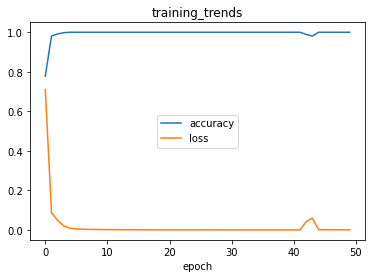

In [60]:
plt.plot(model_L2_normal.history['accuracy'])
plt.plot(model_L2_normal.history['loss'])
plt.title('training_trends')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='center')
plt.show()

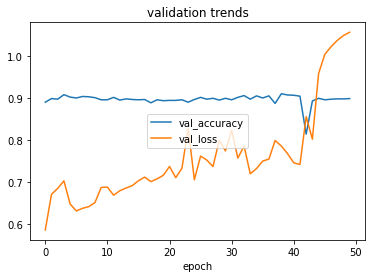

In [61]:
plt.plot(model_L2_normal.history['val_accuracy'])
plt.plot(model_L2_normal.history['val_loss'])
plt.title('validation trends')
plt.xlabel('epoch')
plt.legend(['val_accuracy', 'val_loss'], loc='center')
plt.show()

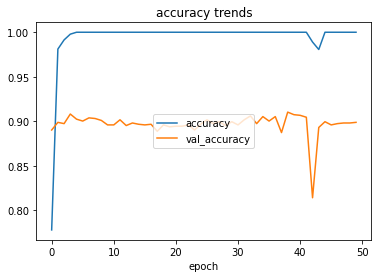

In [62]:
plt.plot(model_L2_normal.history['accuracy'])
plt.plot(model_L2_normal.history['val_accuracy'])
plt.title('accuracy trends')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='center')
plt.show()

In [63]:
test_accuracy_l2 = model_L2.evaluate(test_generator)

87/87 [==============================] - 7s 85ms/step - loss: 0.9884 - accuracy: 0.8642


## Part3 - ** only for 574 students **.
1. Fine tune the well pre-trained model, Resnet 50, with different freeze layers. 
First,  load pre-trained resnet 50 from library.
Second, Fine-tune the model to fit our project, 10-classes.
Third,  freeze different layers, plot different training process with different frozen layers (at least three different layers).

In [32]:
resnet_model_2 = Sequential()
resnet_50_2 = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=10,pooling='max')

# define the freeze layers 
# your Code HERE
#Freezing some layers to reduce training time
#Batch Normalization Layer
resnet_50_2.layers[43].trainable = False
#Activation Function
resnet_50_2.layers[44].trainable = False
#Conv2D Hidden Layer
resnet_50_2.layers[45].trainable = False


# Fine-tune the model to fit our project  
# your Code HERE
#Adding pretrained model to Sequential
resnet_model_2.add(resnet_50_2)
#Dropout to reduce dimension
resnet_model_2.add(Dropout(0.5))
#Flattening the model to single dimension
resnet_model_2.add(Flatten())
#Output Layer for 10 classes and activation used is softmax as it gave us decent accuracy in last model
resnet_model_2.add(Dense(10,activation='softmax'))

resnet_model_2.compile(optimizer='adam',
                    loss= 'categorical_crossentropy',
                    metrics=['accuracy'])


In [33]:
resnet_model_normal_2 = resnet_model_2.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=valid_generator,validation_steps=len(valid_generator))

Epoch 1/50
261/261 [==============================] - 61s 215ms/step - loss: 3.9169 - accuracy: 0.7522 - val_loss: 10.7248 - val_accuracy: 0.1034
Epoch 2/50
261/261 [==============================] - 55s 210ms/step - loss: 1.0855 - accuracy: 0.9215 - val_loss: 6.6492 - val_accuracy: 0.1034
Epoch 3/50
261/261 [==============================] - 56s 213ms/step - loss: 0.6305 - accuracy: 0.9567 - val_loss: 4.0703 - val_accuracy: 0.1178
Epoch 4/50
261/261 [==============================] - 55s 212ms/step - loss: 0.6946 - accuracy: 0.9540 - val_loss: 2.6374 - val_accuracy: 0.8017
Epoch 5/50
261/261 [==============================] - 56s 213ms/step - loss: 0.4372 - accuracy: 0.9727 - val_loss: 6.6313 - val_accuracy: 0.7665
Epoch 6/50
261/261 [==============================] - 56s 215ms/step - loss: 0.6116 - accuracy: 0.9650 - val_loss: 1.7705 - val_accuracy: 0.9253
Epoch 7/50
261/261 [==============================] - 56s 213ms/step - loss: 0.2310 - accuracy: 0.9856 - val_loss: 14.0708 - val_

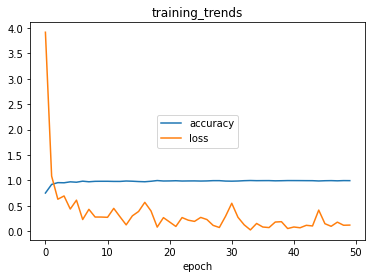

In [34]:
plt.plot(resnet_model_normal_2.history['accuracy'])
plt.plot(resnet_model_normal_2.history['loss'])
plt.title('training_trends')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='center')
plt.show()

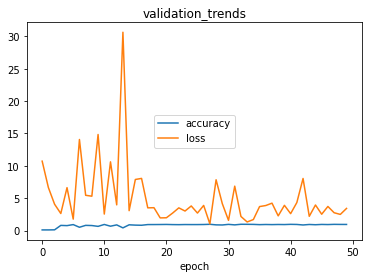

In [35]:
plt.plot(resnet_model_normal_2.history['val_accuracy'])
plt.plot(resnet_model_normal_2.history['val_loss'])
plt.title('validation_trends')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='center')
plt.show()

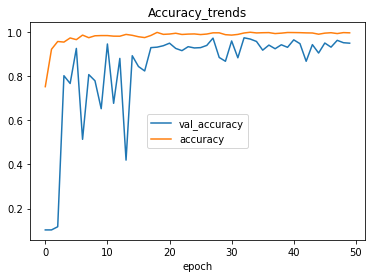

In [47]:
plt.plot(resnet_model_normal_2.history['val_accuracy'])
plt.plot(resnet_model_normal_2.history['accuracy'])
plt.title('Accuracy_trends')
plt.xlabel('epoch')
plt.legend(['val_accuracy', 'accuracy'], loc='center')
plt.show()

In [36]:
resnet_model_2.evaluate(test_generator)

87/87 [==============================] - 9s 98ms/step - loss: 3.4598 - accuracy: 0.9511


[3.4598381519317627, 0.9511494040489197]

In [40]:
resnet_model_3 = Sequential()
resnet_50_3 = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),classes=10,pooling='max')

# define the freeze layers 
# your Code HERE
#Freezing some layers to reduce training time as the model has already been pretrained
#Input Layer of resnet50
resnet_50_2.layers[0].trainable = False
#Batch Normalization Layer
resnet_50_2.layers[36].trainable = False
#Output Layer's Pooling Layer
resnet_50_2.layers[-1].trainable = False
#Output Layer's Activation Function
resnet_50_2.layers[-2].trainable = False


# Fine-tune the model to fit our project  
# your Code HERE
#Adding pretrained model to Sequential
resnet_model_3.add(resnet_50_3)
# Adding dropout regularizer to reduce overfitting
resnet_model_3.add(Dropout(0.5))
#Flattening the layers to reduce overfitting
resnet_model_3.add(Flatten())
#The 64 neurons passed in the dense will be learning 
# resnet_model_2.add(Dense(1024,activation='relu'))
#Output Layer for 10 classes and activation used is softmax as it gave us decent accuracy in last model
resnet_model_3.add(Dense(10,activation='softmax'))

#Optimizer,loss function and accuracy are the same as previous ones
resnet_model_3.compile(optimizer='adam',
                    loss= 'categorical_crossentropy',
                    metrics=['accuracy'])


In [41]:
resnet_model_normal_3 = resnet_model_3.fit(train_generator,steps_per_epoch=len(train_generator),epochs=epochs,validation_data=valid_generator,validation_steps=len(valid_generator))

Epoch 1/50
261/261 [==============================] - 63s 218ms/step - loss: 4.0088 - accuracy: 0.7349 - val_loss: 5.8605 - val_accuracy: 0.1034
Epoch 2/50
261/261 [==============================] - 55s 212ms/step - loss: 0.9905 - accuracy: 0.9198 - val_loss: 11.8954 - val_accuracy: 0.0862
Epoch 3/50
261/261 [==============================] - 56s 213ms/step - loss: 0.6803 - accuracy: 0.9449 - val_loss: 21.1413 - val_accuracy: 0.0862
Epoch 4/50
261/261 [==============================] - 56s 213ms/step - loss: 0.5381 - accuracy: 0.9569 - val_loss: 5.1062 - val_accuracy: 0.7112
Epoch 5/50
261/261 [==============================] - 56s 213ms/step - loss: 0.6460 - accuracy: 0.9533 - val_loss: 2.4945 - val_accuracy: 0.8807
Epoch 6/50
261/261 [==============================] - 56s 214ms/step - loss: 0.4469 - accuracy: 0.9751 - val_loss: 2.0076 - val_accuracy: 0.8987
Epoch 7/50
261/261 [==============================] - 56s 215ms/step - loss: 0.2927 - accuracy: 0.9773 - val_loss: 1.4253 - val_

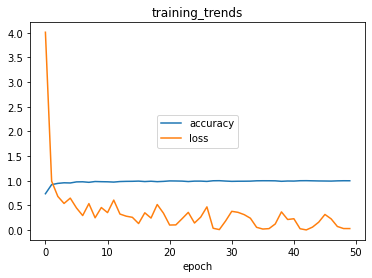

In [43]:
plt.plot(resnet_model_normal_3.history['accuracy'])
plt.plot(resnet_model_normal_3.history['loss'])
plt.title('training_trends')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='center')
plt.show()

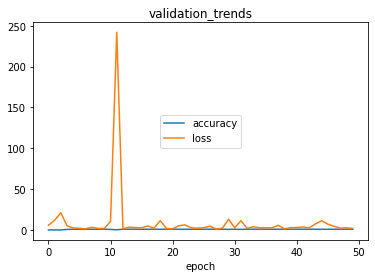

In [44]:
plt.plot(resnet_model_normal_3.history['val_accuracy'])
plt.plot(resnet_model_normal_3.history['val_loss'])
plt.title('validation_trends')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='center')
plt.show()

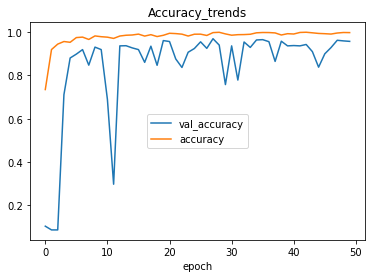

In [46]:
plt.plot(resnet_model_normal_3.history['val_accuracy'])
plt.plot(resnet_model_normal_3.history['accuracy'])
plt.title('Accuracy_trends')
plt.xlabel('epoch')
plt.legend(['val_accuracy', 'accuracy'], loc='center')
plt.show()

In [42]:
resnet_3_accuracy = resnet_model_3.evaluate(test_generator)

87/87 [==============================] - 8s 96ms/step - loss: 2.0695 - accuracy: 0.9727
